<a href="https://colab.research.google.com/github/imitationmask/learning-from-data/blob/main/lfd_exercise_1_11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**(c) If p = 0.9, what is the probability that S will produce a better hypothesis than C?**


probability = $\sum_{i=13}^{25} C_{i}^{25} *p^i*(1-p)^{(25-i)}$


In [6]:
from scipy.special import comb
proba = .0
for i in range(13, 26):
  proba += comb(25, i) * .9**i * (1-.9)**(25-i)
proba

0.9999998379165841

**(d) Is there any value of p for which it is more likely than not that C (crazy) will produce a better hypothesis than S (smart)?**

In [24]:
proba = .0
p = .5
for i in range(13, 26):
  proba += comb(25, i) * p**i * (1-p)**(25-i)
proba

0.5

*I don't think there is a value of p. If p > .5, Smart will pick h1 and Smart wins. If p < .5, smart will pick h2 and Smart wins. If p = .5, Smart and Crazy will perform the same statistically.*

*Below runs an estimate of Smart for different values of p. But of course, when p goes under .5 the graph does not hold any more since Smart will pick h2 instead.*

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
experiments = 10**5
full = 10**2
train = 25
test = full - train
p_list = np.arange(0, 1, .01)
p_smart_wins_list = []

for p in p_list:
  num_of_ones = int(full * p)
  num_of_minus_ones = full - num_of_ones
  ones = np.ones(num_of_ones)
  minus_ones = 0 - np.ones(num_of_minus_ones)
  full_y = np.concatenate((ones, minus_ones))
  smart_wins = 0
  for _ in range(experiments):
    smart = False
    np.random.shuffle(full_y)
    train_y = full_y[:train]
    # print('train_y == 1: {} , train_y == -1: {}'.format(np.sum(train_y == 1), np.sum(train_y == -1)))
    
    if np.sum(train_y == 1) >= np.sum(train_y == -1):
      smart = True

    test_y = full_y[train:]
    # print('test_y == 1: {} , test_y == -1: {}'.format(np.sum(test_y == 1), np.sum(test_y == -1)))
    
    if np.sum(test_y == 1) >= np.sum(test_y == -1) and smart:
      smart_wins += 1
  p_smart_wins = smart_wins / experiments
  p_smart_wins_list.append(p_smart_wins)

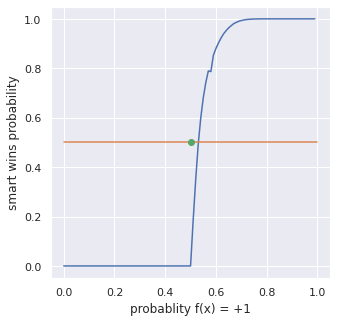

In [23]:
sns.set()
plt.figure(figsize=(5,5))
plt.plot(p_list, p_smart_wins_list)
plt.xlabel('probablity f(x) = +1')
plt.ylabel('smart wins probability')
plt.plot([0, 1], [.5, .5])
plt.plot(.5, .5, marker='o')